In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
train = datasets.MNIST("", train=True,
                       transform=transforms.Compose([transforms.ToTensor()]), download=True)

test = datasets.MNIST("", train=False,
                      transform=transforms.Compose([transforms.ToTensor()]), download=True)

In [3]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [4]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

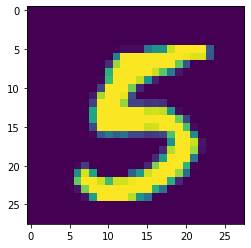

In [5]:
from matplotlib import pyplot as plt

for data in trainset:
    print(data)
    plt.imshow(data[0][0].view(28, 28))
    plt.show()
    break


# Kỹ thuật đếm các catalog dựa vào dict

In [11]:
counter_dict = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
for _, Y in trainset:
    for y in Y:
        counter_dict[int(y)] += 1
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [12]:
total = sum([counter_dict[i] for i in counter_dict])

In [13]:
total

60000

In [14]:
import torch.nn as nn
import torch.nn.functional as F

In [26]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 64)
        self.fc2 = nn.Linear(64, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 10)
        self.activation1 = nn.Softmax(dim=1)
        self.activation2 = nn.ReLU()

    def forward(self, x):
        x = x.reshape(-1, 28 * 28)
        x = self.fc1(x)
        x = self.activation2(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.activation2(x)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)
        # x = self.activation1(x)
        # return x


net = Net().cuda()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (activation1): Softmax(dim=1)
  (activation2): ReLU()
)


In [27]:
# Test the model
x = torch.randn(28, 28).cuda()
net(x)

tensor([[-2.2560, -2.2967, -2.5257, -2.3406, -2.6762, -2.3121, -1.9027, -2.2102,
         -2.2709, -2.4254]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

In [17]:
# Optimizer
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3


In [28]:
for i in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()  #  sets gradients to 0 before loss calc. You will do this likely every step.
        X = X.cuda()
        y = y.cuda()
        y_pred = net(X)
        # y_pred = net(X.view(-1,784))
        loss = F.nll_loss(y_pred, y)

        loss.backward()
        optimizer.step()
    print(loss.item())

2.308985710144043
2.2944273948669434
2.3619513511657715


In [18]:
# Evaluate the model

In [29]:
correct = 0
total = 0

with torch.no_grad():  # or: torch.eval() (remove Gradient cal function)
    for data in testset:
        X, y = data
        X = X.cuda()
        y = y.cuda()
        output = net(X)
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy :", round(correct / total, 3))

Accuracy : 0.073


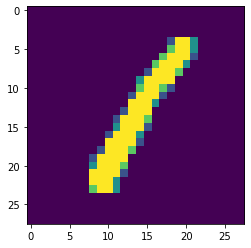

In [96]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28, 28).cpu())
plt.show()